# Explore `arcgis.gis`

**NOTE**

Only works with ArcGIS Enterprise or ArcGIS Online. This does not work with an ArcGIS Server site, thus limiting the utility to manage services automatically, until we have upgrade to ArcGIS Enterprise/Poral.

Specifically, a *service definition (sd)* file is required to publish a service, which can be created in ArcGIS Desktop and Pro. To automate the creation of a sd file, `arcpy` is required.

Import password from `config.py` located in the same location

In [1]:
from config import myuser, mypassword

In [2]:
from arcgis.gis import GIS

Connect to UNEP-WCMC on arcgis.com. Note it is case senstive. The name of the organsation can be found in the user profile - in this case `UNEP-WCMC.maps`. The organisation URL is https://UNEP-WCMC.maps.arcgis.com

In [3]:
gis = GIS("https://unep-wcmc.maps.arcgis.com", myuser, mypassword)

In [4]:
user = gis.users.get('Yichuans')

## Search content and display info

In [6]:
user

<User username:Yichuans>

In [7]:
gis.content

In [32]:
from IPython.display import display, HTML

In [12]:
items = gis.content.search('World Heritage')

In [16]:
items[0].id

'b68c5e4615324448bd46541778b60706'

<Item title:"Latest L8 imagery" type:Web Map owner:Yichuans>
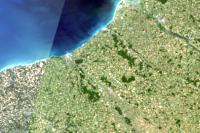

In [17]:
gis.content.get(items[0].id)

<Item title:"Latest L8 imagery" type:Web Map owner:Yichuans>
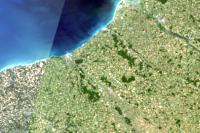

In [19]:
items[0]

In [25]:
items = gis.content.search('World Heritage', sort_field="numViews", sort_order="desc")

In [26]:
[item.name for item in items]

[None, None, None, 'WH_2015', 'WH_poly_2014', None, None, None, None, None]

In [33]:
display(HTML(items[0].description))

<Item title:"Natural World Heritage sites" type:Feature Layer Collection owner:Yichuans>
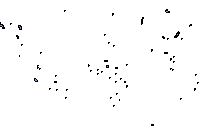

In [48]:
items[0]

In [49]:
wh = items[0]

## Testing adding content

In [34]:
!echo "col1,col2\n1,2" > test.csv

In [36]:
csv_path = 'test.csv'
csv_properties = {
    'title': 'test_csv',
    'description': 'test descriptino for csv programmtica',
    'tags': 'test'
}

test_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path)

In [37]:
test_csv_item

<Item title:"test_csv" type:CSV owner:Yichuans>

In [38]:
gis.content.add?

In [40]:
gis.content.import_data?

In [42]:
gis.content.bulk_update?

In [47]:
len(gis.content.search(''))

10

User groups

In [56]:
[(group.id, group.title) for group in gis.groups.search('')]

[('0da934b864cb416da378513f52f7566f', 'Collaboration Group'),
 ('c154106230884c63950d9b00f837cd44', 'Database'),
 ('d2a65ad1db334807ae4052aee766a446', 'Enterprise_Dist_Collab'),
 ('81de655b9544449d938a10f2362fbd21', 'fds'),
 ('7b87f005e18b4203a5b929a37a362107', 'Hub Administration Group'),
 ('963e925556844dca9bfbcc048bf44a2c', 'MapX'),
 ('b14dc7bd1be24375b316197a98fad901', 'The Development Corridors Partnership'),
 ('e3efb3a7d37e4e0fb0079bbcdd63d2e3', 'UNEP-WCMC ArcGIS Pro Map Templates'),
 ('b46faeae27444056be6e4898fa1d8070', 'WCMC GEOPlanner')]

In [60]:
gis.groups.get('963e925556844dca9bfbcc048bf44a2c').content()

[<Item title:"Biodiversity_intactness" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Global Gridded Geographically Based Economic Data (2005)" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Global_Distribution_of_Saltmarshes" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Global_Distribution_of_Seagrasses" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Global_Distribution_of_Warm_Water_Coral_Reefs" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Range rarity" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"range_rarity_EOO" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Species richness" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"species_richness_EOO" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"Threatened species richness" type:Map Image Layer owner:joe.gosling_UNEP_WCMC>,
 <Item title:"threatened_species_richness_EOO" t

In [61]:
gis.groups.get('963e925556844dca9bfbcc048bf44a2c').get_members()

{'admins': ['osgur.mcdermott.long_UNEP_WCMC'],
 'owner': 'osgur.mcdermott.long_UNEP_WCMC',
 'users': ['Corinna_UNEP_WCMC', 'joe.gosling_UNEP_WCMC']}

In [63]:
gis.groups.get('b14dc7bd1be24375b316197a98fad901').get_members()

{'admins': ['diego.juffe_UNEP_WCMC'],
 'owner': 'diego.juffe_UNEP_WCMC',
 'users': []}

User

In [64]:
gis.users.me

<User username:Yichuans>

In [70]:
gis.users.search(max_users=999)

[<User username:alex.ross_UNEP_WCMC>,
 <User username:Andrea.Baquero_UNEP_WCMC>,
 <User username:andy.arnell_UNEP_WCMC>,
 <User username:Arnout_UNEP_WCMC>,
 <User username:aude.caromel_UNEP_WCMC>,
 <User username:Barbara.Pollini_UNEP_WCMC7>,
 <User username:Brian.O_UNEP_WCMC>,
 <User username:Carolina.Soto_Navarro_UNEP_WCMC>,
 <User username:Chris.Mcowen_UNEP_WCMC>,
 <User username:Ciara.Stafford_UNEP_WCMC>,
 <User username:clare.lewis_UNEP_WCMC>,
 <User username:Corinna_UNEP_WCMC>,
 <User username:cps_intern_UNEP_WCMC>,
 <User username:diego.juffe_UNEP_WCMC>,
 <User username:eapintern_UNEP_WCMC>,
 <User username:Edward_Lewis_UNEP_WCMC>,
 <User username:elizabeth.green_UNEP_WCMC>,
 <User username:emma.martin_UNEP_WCMC>,
 <User username:Emma.Scott_UNEP_WCMC>,
 <User username:Emma.Vovk_UNEP_WCMC>,
 <User username:Frances.Davis_UNEP_WCMC>,
 <User username:Hazel.Thornton_UNEP_WCMC>,
 <User username:HeatherB_WCMC>,
 <User username:Helen.Klimmek_UNEP_WCMC>,
 <User username:jennifer.mark_UNEP

In [75]:
import numpy as np
import pandas as pd

In [154]:
# bytes -> mega 1e6 bytes (MB)
userstats = [(user.fullName, 
              user.email,
              user.storageUsage/1024/1024, 
              user.storageQuota/1024/1024)
 for user in gis.users.search(max_users=150)]

In [155]:
user_df = pd.DataFrame(userstats, columns=['name', 'email', 'useage', 'limit'])

In [156]:
user_df.sort_values(['useage'], ascending=False)

,name,email,useage,limit
29,Joe Gosling,joe.gosling@unep-wcmc.org,11806.190443,2048.0
27,Jess Stewart,jessica.stewart@unep-wcmc.org,1152.980049,2048.0
18,Emma Scott,Emma.Scott@unep-wcmc.org,732.830935,2048.0
15,Edward Lewis,edward.lewis@unep-wcmc.org,550.342731,2048.0
64,Yichuan Shi,yichuan.shi@unep-wcmc.org,370.465370,2048.0
11,Corinna Ravilious,Corinna.Ravilious@unep-wcmc.org,351.360014,2048.0
62,Will Carney,William.carney@unep-wcmc.org,106.714869,2048.0
13,Diego Juffe-Bignoli,diego.juffe@unep-wcmc.org,78.225690,2048.0
47,Osgur McDermott Long,osgur.mcdermott.long@unep-wcmc.org,74.375496,2048.0
59,Help Desk,helpdesk@unep-wcmc.org,51.644014,2048.0


In [157]:
# user_df.to_csv('userstats.csv')

In [158]:
# in MB
gis.users.me.storageUsage/1024/1024

15278.164681434631

In [150]:
a = gis.users.search('Jonty')[0]

In [153]:
a.storageUsage

16020316809

In [163]:
a

<User username:jonty.knox_UNEP_WCMC>

In [159]:
b = gis.users.search('Yichuan')[0]

In [160]:
b.storageUsage

16020316809

In [162]:
b

<User username:Yichuans>

In [161]:
type(b)

arcgis.gis.User

In [144]:
gis.users.search('Joe')[0].storageUsage/1024/1024

15278.164681434631

In [145]:
gis.users.search('Jonty')[0].storageUsage/1024/1024

15278.164681434631

Bug above?

`GIS` properties

In [103]:
gis.properties.name

'UN Environment World Conservation Monitoring Centre'

In [104]:
gis.properties.availableCredits

6009.262

In [105]:
gis.properties.customBaseUrl

'maps.arcgis.com'

In [109]:
# display(dict(gis.properties))

Administration

In [112]:
gis.admin

<AGOLAdminManager at https://UNEP-WCMC.maps.arcgis.com/sharing/rest/>

In [113]:
import arcgis

In [115]:
arcgis.__version__

'1.5.0'

The below only works with an account with administrative privileges. The server module is only applicable if `gis` is an instance of ArcGIS Enterprise and would not work for ArcGIS Online.

In [117]:
gis.admin.servers.list()

AttributeError: 'AGOLAdminManager' object has no attribute 'servers'